# Tesla Stock Price Versus Revenue Comparison

### Importing Necessary library

In [5]:
import pandas as pd
import requests
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Getting Stock Price of Tesla From Yahoo Finance Library

In [6]:
tesla=yf.Ticker('TSLA')
tesla_data=tesla.history(period='max')
tesla_stock=pd.DataFrame(tesla_data)
tesla_stock.reset_index(inplace=True)
tesla_stock

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0
...,...,...,...,...,...,...,...,...
3391,2023-12-18,253.779999,258.739990,251.360001,252.080002,116416500,0,0.0
3392,2023-12-19,253.479996,258.339996,253.009995,257.220001,106737400,0,0.0
3393,2023-12-20,256.410004,259.839996,247.000000,247.139999,125097000,0,0.0
3394,2023-12-21,251.899994,254.800003,248.550003,254.500000,109594200,0,0.0


### Using Webscraping to Extract Tesla Revenue Data

In [7]:
url=' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_data=requests.get(url).text

In [9]:
data=pd.read_html(html_data)
tesla_revenue=pd.DataFrame(data[1])
tesla_revenue.head()

,Tesla Quarterly Revenue(Millions of US $),Tesla Quarterly Revenue(Millions of US $).1
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"


### Renaming Columns Name For Better Readability

In [16]:
tesla_revenue.rename(columns={'Tesla Quarterly Revenue(Millions of US $)':'Date','Tesla Quarterly Revenue(Millions of US $).1':'Revenue'},inplace=True)
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"",regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.head()

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757


### Defining function For Plotting Data

In [12]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

### Plotting Graph

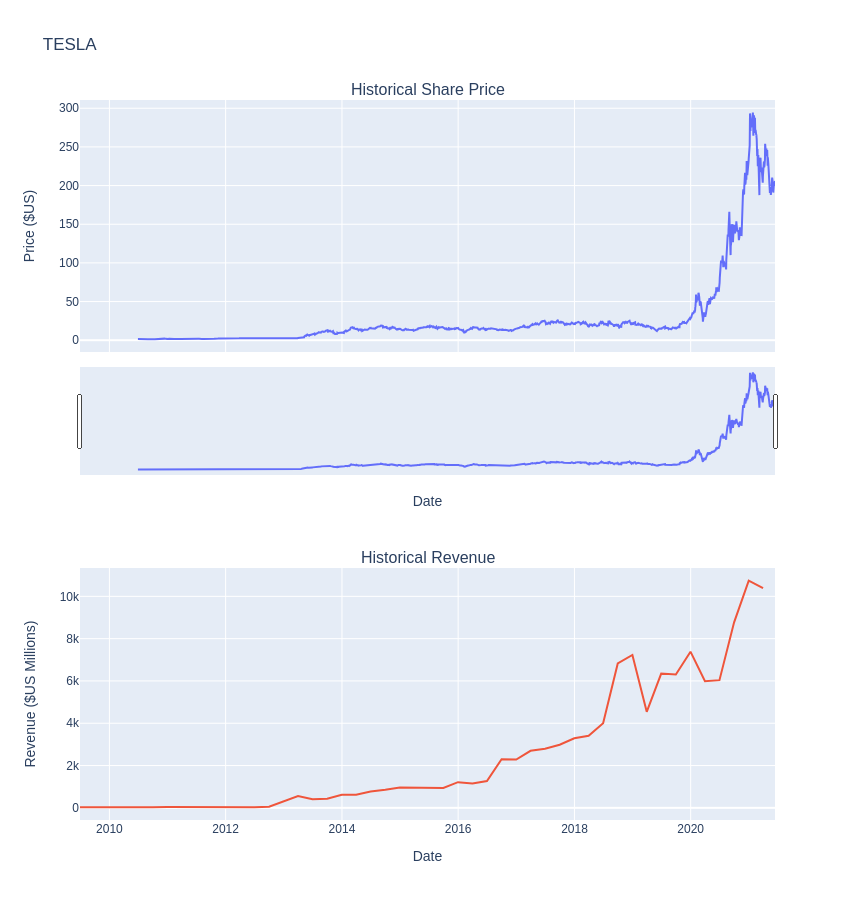

In [17]:
make_graph(tesla_data,tesla_revenue,'TESLA')

### Conclusion
In this project I have analyzed the stock price and Revenue of famous company TESLA from 2010 to 2021 and found that:
* The stock price increases with increase in company revenue.
* The revenue of Tesla has increased as the time has elapsed.

Note: The chart, a visual symphony of data, renders complexities into simplicity and narratives into visuals, transcending the confines of mere numbers.